<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
keras.layers.Layer.weights
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.signal import convolve2d

In [6]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
class_labels = list(set(y_train))
# add color channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# normalize
x_train, x_test = x_train/255.0, x_test/255.0
# one-hot encoding
label_train, label_test = to_categorical(y_train), to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


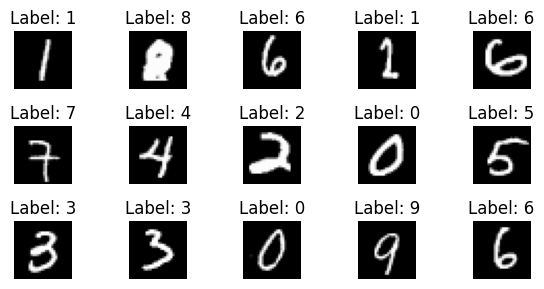

In [7]:
num_row, num_col = 3, 5

idx_10 = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,))
x_train_10, y_train_10 = x_train[idx_10], y_train[idx_10]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(6, 3))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train_10[i])))
    ax.imshow(x_train_10[i], cmap=plt.cm.gray)
    ax.axis('off')
plt.tight_layout()
plt.show()

Ref: https://cs231n.github.io/convolutional-networks/ for number of padding/dimension

In [8]:
num_filter = [2, 1]
iter = 10000
bias = np.random.normal(loc=0.0, scale=1.0, size=len(num_filter))

mnist_cnn = models.Sequential() # initialize model
mnist_cnn.add(Conv2D(filters = num_filter[0],
                     kernel_size = (3,3),
                     padding = 'same',
                     strides=(1,1),
                     bias_initializer=Constant(bias[0]),
                     activation="sigmoid",
                     input_shape = (28,28,1)))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
mnist_cnn.add(Conv2D(filters = num_filter[1],
                     kernel_size = (2,2),
                     padding = 'Same',
                     strides=(1,1),
                     bias_initializer=Constant(bias[1]),
                     activation ='sigmoid'))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # strides = (1,1)
mnist_cnn.add(Flatten())
mnist_cnn.add(Dense(10, activation = "softmax"))
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# CNN

In [9]:
mnist_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 2)           │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 2)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 1)           │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 169)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,729 (6.75 KB)

 Trainable params: 1,729 (6.75 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
mnist_cnn_fit = mnist_cnn.fit(x_train, label_train, epochs = 50, batch_size = 250)

Epoch 1/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.1309 - loss: 2.3458
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.1149 - loss: 2.3062
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.1125 - loss: 2.3035
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.1142 - loss: 2.3004
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.1157 - loss: 2.2980
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - accuracy: 0.1182 - loss: 2.2949
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.1234 - loss: 2.2905
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.1619 - loss: 2.2846
Epoch 9/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.1882 - loss: 2.2748
Epoch 10/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.2683 - loss: 2.2588
Epoch 11/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.3593 - loss: 2.2291
Epoch 12/50
240/240 ━━━━━━━━━

In [11]:
layer_names = [layer.name for layer in mnist_cnn.layers]
layer_names

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense']

In [12]:
conv1_W, conv1_b = mnist_cnn.layers[layer_names.index('conv2d')].get_weights()
conv2_W, conv2_b = mnist_cnn.layers[layer_names.index('conv2d_1')].get_weights()
dense_W, dense_b = mnist_cnn.layers[layer_names.index('dense')].get_weights()

In [13]:
def same_padding(images, filter_h, filter_w, stride):
    sample_size, img_h, img_w, _ = images.shape
    stride_h, stride_w = stride

    pad_h = ((stride_h-1)*img_h + filter_h - stride_h) // 2
    pad_w = ((stride_w-1)*img_w + filter_w - stride_w) // 2

    output = []
    for n in range(sample_size):
      padded_img = np.pad(images[n,:,:,:], ((pad_h, pad_h), (pad_w, pad_w), (0,0)), mode='constant', constant_values=0)
      output.append(padded_img)

    return np.array(output)

In [14]:
def get_start_index(output_height, output_width, stride_height, stride_width, kernel_height, kernel_width):
    h_start, h_end, w_start, w_end = [], [], [], []
    i, j = 0, 0

    while i <= output_height and j <= output_width:
        h_start_value = i*stride_height
        h_end_value = h_start_value + kernel_height
        w_start_value = j*stride_width
        w_end_value = w_start_value + kernel_width
        if h_end_value <= output_height or w_end_value <= output_width:
           h_start.append(h_start_value)
           #h_end.append(h_end_value)
           w_start.append(w_start_value)
           #w_end.append(w_end_value)
        i+=1
        j+=1
    return h_start, w_start

In [15]:
def reLU(images):
  return np.maximum(0, images)

def sigmoid(images):
	return 1.0 / (1.0 + np.exp(-images))

def softmax(images):
  sample_size, num_classes = images.shape
  max_idx = []

  for n in range(sample_size):
    exp_x = np.exp(images[n] - np.max(images[n]))
    p = exp_x/exp_x.sum()
    max_idx.append(np.argmax(p))
  return np.array(max_idx)

In [16]:
def Convo2D(images, filters, stride, bias, padding):
    filter_h, filter_w, in_channels, out_channels = filters.shape

    if padding:
      img_padded = same_padding(images, filter_h, filter_w, stride)
    else:
      img_padded = images

    sample_size, input_h, input_w, channels = img_padded.shape
    stride_h, stride_w = stride
    output_h = input_h - filter_h + 1
    output_w = input_w - filter_w + 1
    convo_img = np.empty((sample_size, output_h, output_w, out_channels))

    for i in range(output_w):
        for j in range(output_h):
            h_start_idx = i*stride_h
            w_start_idx = j*stride_w
            sub_img = img_padded[:, h_start_idx:(h_start_idx+filter_h), w_start_idx:(w_start_idx+filter_w)]

            for f in range(out_channels):
                res = np.sum(sub_img * filters[:,:,:, f], axis=(1, 2, 3)) + bias[f]
                convo_img[:, i, j, f] = res

    return sigmoid(convo_img)

In [17]:
def max_pooling(images, pool_size, stride):
    sample_size, input_h, input_w, channels = images.shape
    kernel_h, kernel_w = pool_size
    stride_h, stride_w = stride

    output_w = (input_w - kernel_w) // stride_w + 1
    output_h = (input_h - kernel_h) // stride_h + 1
    pooled_img = np.empty((sample_size, output_h, output_w, channels))

    for n in range(sample_size):
        sub_img = images[n]
        for c in range(channels):
          for i in range(output_h):
            for j in range(output_w):
                h_start_idx = i*stride_h
                w_start_idx = j*stride_w
                subsection = sub_img[h_start_idx:(h_start_idx+kernel_h), w_start_idx:(w_start_idx+kernel_w), c]
                pooled_img[n, i, j, c] = np.max(subsection)

    return pooled_img

In [18]:
def dense_layer(images, weights, bias):
  sample_size = images.shape[0]
  img_flattened = images.reshape(sample_size, -1)
  output = np.dot(img_flattened, weights) + bias
  return output

In [19]:
convo1_out = Convo2D(x_test, filters=conv1_W, stride=(1,1), bias = conv1_b, padding=True)
convo1_maxpool = max_pooling(convo1_out, pool_size=(2,2), stride=(1,1))
convo2_out = Convo2D(convo1_maxpool, filters=conv2_W, stride=(1,1), bias = conv2_b, padding=True)
convo2_maxpool = max_pooling(convo2_out, pool_size=(2,2), stride=(2,2))
dense_out = dense_layer(convo2_maxpool, weights=dense_W, bias=dense_b)
pred_classes = softmax(dense_out)

In [20]:
np.mean(pred_classes == y_test)

0.8917

In [21]:
def plot_images(data, labels, nrows=0, images_per_row=0, wspace=0.3, hspace=0.3):
    fig, axes = plt.subplots(nrows, images_per_row, figsize=(7, 4))
    axes = axes.ravel()

    for idx in range(nrows * images_per_row):
        ax = axes[idx]
        image = data[idx]
        label = labels[idx]
        ax.imshow(image, cmap=plt.cm.gray)
        ax.set_title(f"Predicted {label}")
        ax.axis('off')

    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.tight_layout()
    plt.show()

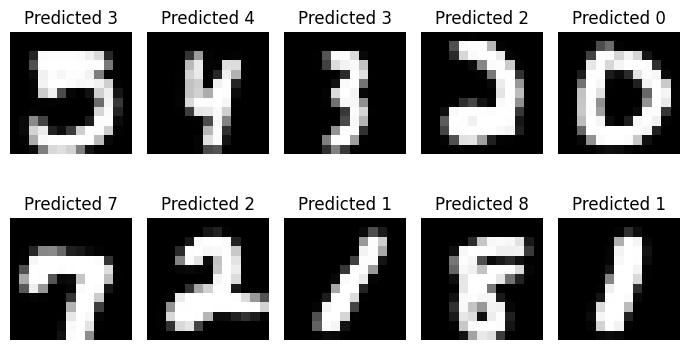

In [22]:
idx = np.random.randint(low=0, high=convo2_maxpool.shape[0], size=(10,))
x_cnn_sampled = convo2_maxpool[idx]
pred_label = pred_classes[idx]
plot_images(x_cnn_sampled, pred_label, 2, 5, wspace=100, hspace=10)

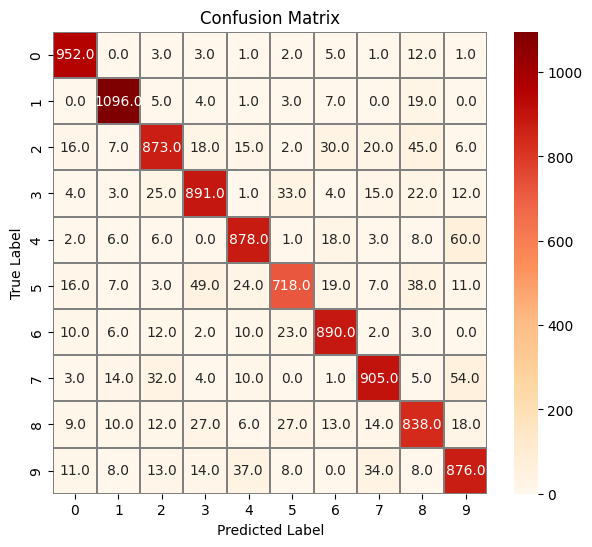

In [23]:
cm = confusion_matrix(y_test, pred_classes)
f,ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="OrRd",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# TDA

In [24]:
!pip install gudhi
import gudhi as gd
from collections import defaultdict
from joblib import Parallel, delayed

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.4 MB/s eta 0:00:00


In [25]:
cnn_img = convo2_maxpool
n = cnn_img.shape[0]

pers = []
for i in range(n):
    rips_complex = gd.RipsComplex(points=cnn_img[i])
    rips_simplex_tree = rips_complex.create_simplex_tree(max_dimension = 10)
    rips_pers = rips_simplex_tree.persistence()
    pers.append(rips_pers)

<ipython-input-25-dd853eb49d51>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rips_complex = gd.RipsComplex(points=cnn_img[i])


In [26]:
def get_simplex_dimension(barcode_data, sample_size):
    dims = []
    for i in range(sample_size):
        dim = [d[0] for d in barcode_data[i]]
        dims.append(np.max(dim))
    return dims

barcode = []
for i in range(n):
    pers_data = pers[i]
    barcode.append([(dim, birth, death) for dim, (birth, death) in pers_data])

highest_dim = get_simplex_dimension(barcode, y_test.shape[0])
np.max(highest_dim)

3

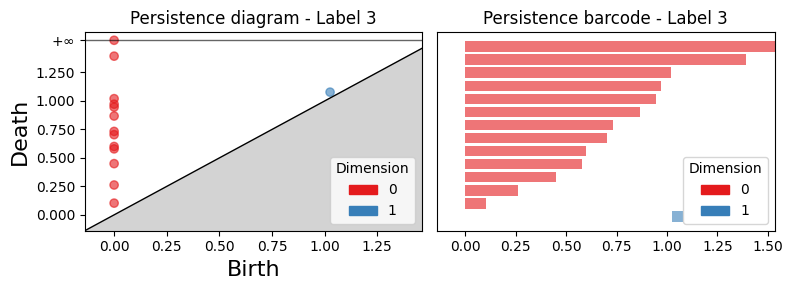

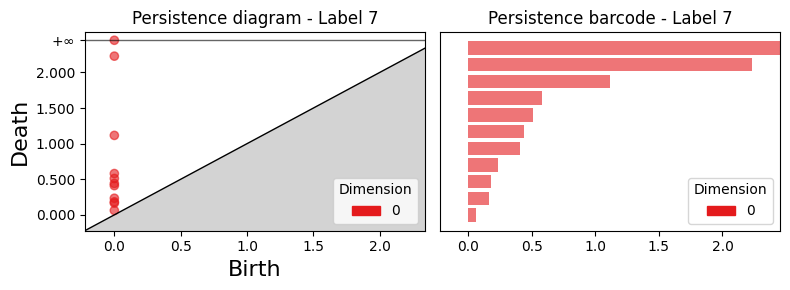

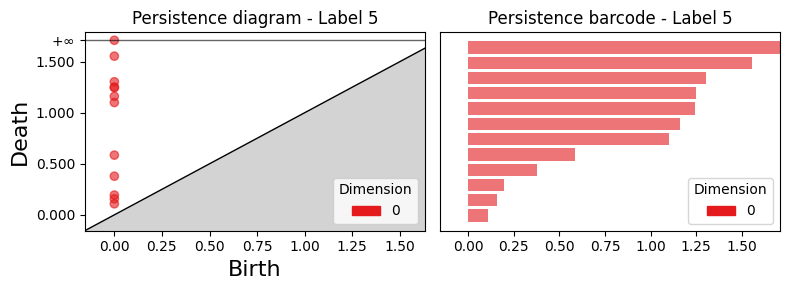

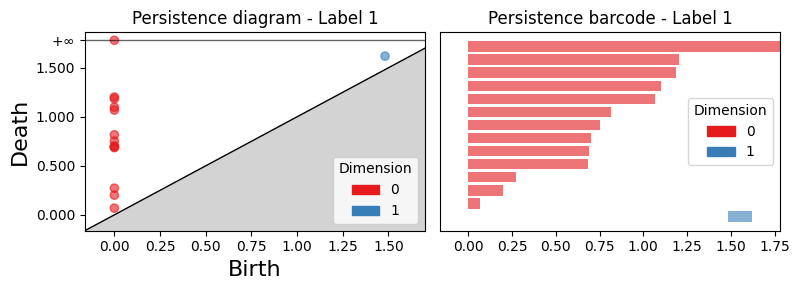

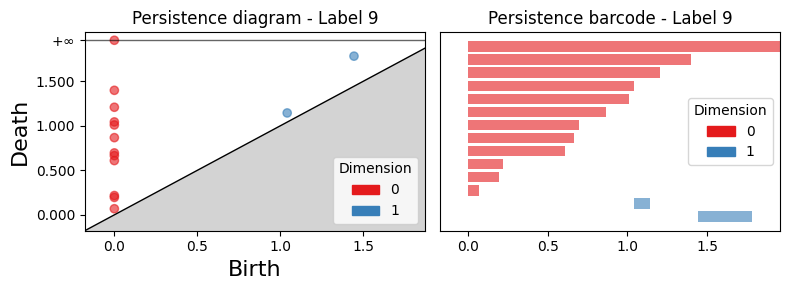

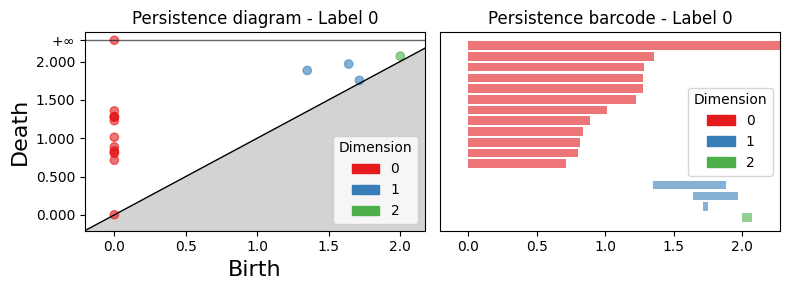

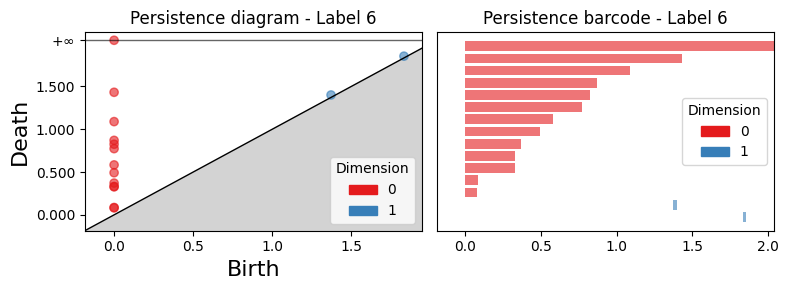

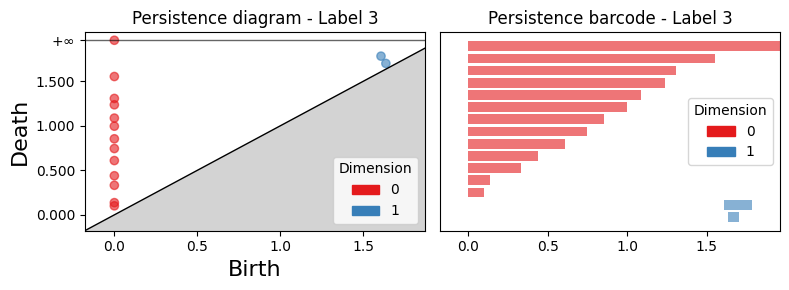

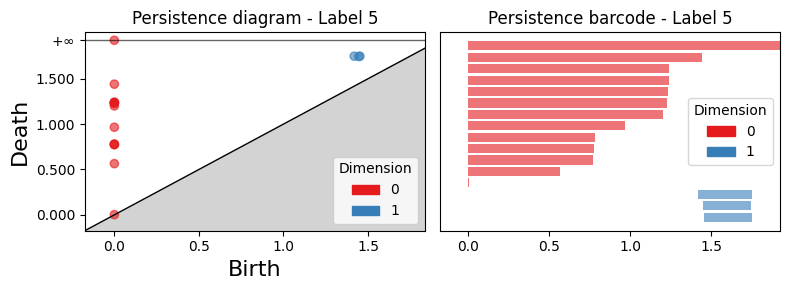

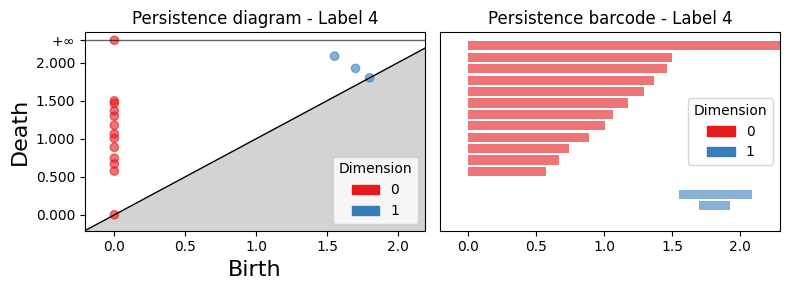

In [29]:
num_row, img_per_row = 10, 2
idx = np.random.randint(low=0, high=x_test.shape[0], size=(num_row,))

for i in range(num_row):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

    gd.plot_persistence_diagram(persistence=pers[idx[i]], axes=axes[0])
    axes[0].set_title(f'Persistence diagram - Label {pred_classes[idx[i]]}')

    gd.plot_persistence_barcode(persistence=pers[idx[i]], axes=axes[1])
    axes[1].set_title(f'Persistence barcode - Label {pred_classes[idx[i]]}')

    plt.tight_layout()
    plt.show()

In [ ]:
def split_by_dimension(barcode):
    dimension_dict = defaultdict(list)
    for dim, (birth, death) in barcode:
        dimension_dict[dim].append((birth, death))
    return dimension_dict

def compute_bottleneck_distance_matrix(persistence_diagrams):
    n = len(persistence_diagrams)

    # Extract all unique dimensions across all diagrams
    all_dimensions = set()
    split_diagrams = []

    for barcode in persistence_diagrams:
        split_dict = split_by_dimension(barcode)
        split_diagrams.append(split_dict)
        all_dimensions.update(split_dict.keys())

    distance_matrices = {dim: np.zeros((n, n)) for dim in all_dimensions}

    def compute_distance(i, j, dim):
        d1 = split_diagrams[i].get(dim, [])
        d2 = split_diagrams[j].get(dim, [])
        return (i, j, dim, gd.bottleneck_distance(d1, d2))

    results = Parallel(n_jobs=-1)(
        delayed(compute_distance)(i, j, dim)
        for i in range(n)
        for j in range(i + 1, n)
        for dim in all_dimensions
    )

    for i, j, dim, dist in results:
        distance_matrices[dim][i, j] = dist
        distance_matrices[dim][j, i] = dist

    return distance_matrices

In [ ]:
pers_subset = pers[:15]
distance_matrices = compute_bottleneck_distance_matrix(pers_subset)

for dim, matrix in distance_matrices.items():
    globals()[f"bn_distance{dim}"] = matrix

In [ ]:
def plot_distance_matrix(matrix, title="Distance Matrix", labels=None):
    plt.figure(figsize=(8,6))
    if labels is not None:
        sns.heatmap(matrix, annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels, cmap="viridis")
    else:
        sns.heatmap(matrix, annot=True, fmt=".2f", cmap="viridis")
    plt.title(title)
    plt.xlabel("Samples")
    plt.ylabel("Samples")
    plt.show()

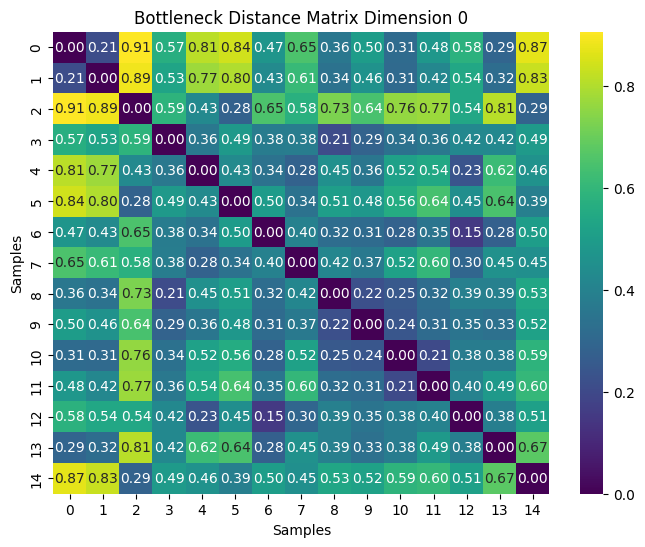

In [ ]:
plot_distance_matrix(bn_distance0, title="Bottleneck Distance Matrix Dimension 0")

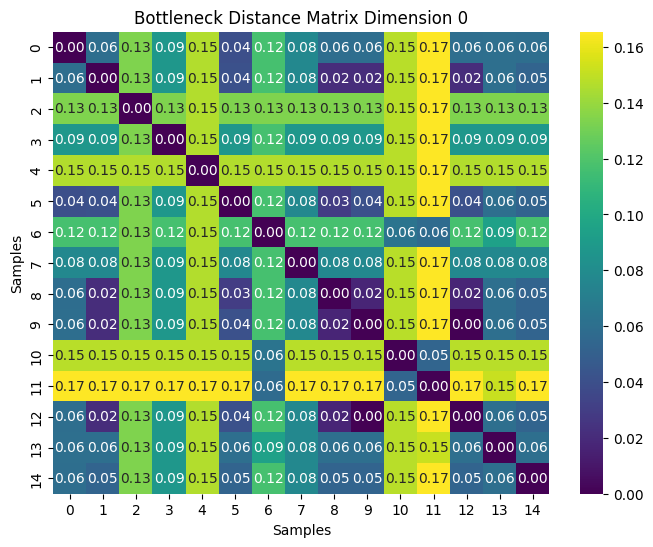

In [ ]:
plot_distance_matrix(bn_distance1, title="Bottleneck Distance Matrix Dimension 1")

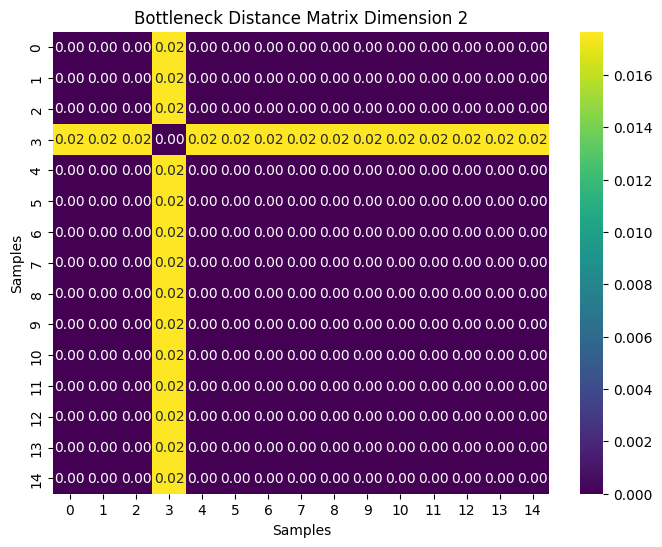

In [ ]:
plot_distance_matrix(bn_distance2, title="Bottleneck Distance Matrix Dimension 2")

In [ ]:
!pip install nibabel
import nibabel